Henry (Hank) Besser

Importing the NumPy and PlyPlot modules and assigning them shorter, more useable aliases (i.e. np and plt, respectively). Also making sure the figures show up inline using a magic function (%matplotlib inline) for overall coherency of the report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Problem under study: 

There are integrals that are very difficult to evaluate or impossible to evaluate in closed form because the domain of integration and/or the overall complexities of the integrand. One example of this is evaluating the period of a non-linear pendulum. The integral shown below (equation 2) cannot be evaluated analytically using elementary functions;   

-------------------------------------

A non-linear pendulum system, where,

$$ Equation 1: \frac{d^2\theta}{dt^2} =  \frac{-g}{l}sin(\theta) $$

and the period of pendulum can show to be:

$$ Equation 2: T =  \sqrt{\frac{8l}{g}}\int_0^{\theta_{max}} \frac{d\theta}{\sqrt{cos\theta-cos\theta_{max}}}$$




$\theta_{max}$ is the maximum angle the pendulum makes with the vertical, and the integral can be calculated by discretizing $\theta$ in equation 2. According to the first-order approximation it possible to calculate the area under the curve and approximate the period ($T$):   

$$ Equation 3: T \approx  \sqrt{\frac{8l}{g}} \sum_{i=0}^{i_{max}-1} \frac{\Delta\theta}{\sqrt{cos(i*\Delta\theta)-cos\theta_{max}}}$$

$\Delta\theta$ is the grid sizes, $i_{max} = \theta_{max}/\Delta\theta$,

$g = 9.8 m/s^2$ and as given, $l = 1m$. 

In this exercise  there will be a comparison of what happens when finding the period for several values of $\theta_{max}$ after numerically integrating the period of a non-linear oscillator.

#### Methods and Thorough Descriptions in the Code

In [2]:
#Preface: if computing many arrays for each theta_max, you must NOT view 
#visualizations inline in Spyder because the legend will crowd the plot.
#So simply change graphics backend to Automatic in Preferences 

#Also this script could have been made without defining a function,
#and input the theta_max and thetha paremeters directly in the script.
#However it was an intriguing task to define a function that would not only 
#plot the Period vs theta_max, but also all 
#the theta*i values for each theta_max
#no matter how many input values are assigned to
#theta_max or what input is assigned to theta_step_size     

def period_numerical_integration(theta_max, theta_step_size):
    """
    Approximates the period a non-linear oscillator by numerical integration.
    Returns and Prints the Period ---PLUS return the the cumulated sum after 
    discretized theta to calculate the area under the curve in sequence.
    
    Input for theta_max must be an array of values.
    """
    
    #Fixed Constants
    g = 9.8 # acceleration of gravity
    length = 1.0 #meter 
    
    # step size that is input (in radians)
    d_theta = float(theta_step_size) # step size (in radians)
    
    
    # number of steps
    # (i.e numerical solutions)
    #for all the input theta_max
    #remember even if only there is only one theta_max
    #it must be in a in a 1-dimensional np array
    N_d_theta_dumby = theta_max/d_theta 
    
    #Number of steps must be an integer (i.e round down to a int data-type)
    N_d_theta = N_d_theta_dumby.astype(int)
    
    # for consistenty each array will be an will the value of the argmax
    #for the largest array
    #this will become more clear as the script pursues    
    arg_max_value = N_d_theta[np.argmax(N_d_theta)]
    
    #initialize
    #variable to store incremental additions
    #this is an array grid (i.e two dimensional array)
    d_period = np.zeros((arg_max_value,len(theta_max)))
    
    
    #initialize
    #all though not required, an intriguing visualiztion is seeing
    #the cumilative sum for the period after each change in period computation.
    #This array-grid will (i.e two dimensional array) store these vales. 
    accumulate_integrations = np.zeros((arg_max_value,len(theta_max)))
    
    #initialize
    #one dimenstional array to store final period values 
    T2 = np.zeros(len(theta_max))
    
    #scalar computation- computed outside of loop
    #for efficiency
    scalar = np.sqrt((8*length)/g)
    
    for i in range(0,len(theta_max)):
        
                
        
        #INITIAL VALUE is always zero
        d_period[:N_d_theta[i],i] = np.arange(0,theta_max[i]-d_theta,d_theta) 
        
        #for consitency in step-size, fill all values past 
        #the number numerical solution as nan (not a number) 
        d_period[N_d_theta[i]:,i] = np.nan
          
        for j in range(0,arg_max_value):
            #remember that eventhought d_period is always intially zero,
            #numerically integrating the sequence at zero does NOT equal zero
            #similar to a Left Reinmann sum calculation
            if j < N_d_theta[i]:
                accumulate_integrations[j,i] = scalar * ((d_theta)\
                / (np.sqrt(np.cos(d_theta*(j))-np.cos(theta_max[i]))))
            
            #for consitency in step-size, fill all values past 
            #the number numerical solution as nan (not a number) 
            else: 
                accumulate_integrations[j,i] = np.nan 
                
             
    
    d_T = d_period       
    
    #accumulate (cumulative sum) values to numerically solve the integral
    # Stores the sum for the specified theta_max
    accumulate_integrations = np.add.accumulate(accumulate_integrations) 

    
    #Now Print Period (corresponding to the specific theta_max value)
    #for this exercise
    for i in range(0,len(theta_max)):

        T2[i] = accumulate_integrations[N_d_theta[i]-1,i]
        
        print("Theta_max =",theta_max[i],"rad")
        print("And, Period of Pendulum = ", T2[i],"s","\n")

   
    return d_T,accumulate_integrations, T2, theta_max 
    

In [3]:
d_T, all_ints, T2,theta_max_values = period_numerical_integration(\
theta_max=np.linspace(np.pi/30,59*np.pi/60,20), theta_step_size=0.001)

Theta_max = 0.10471975512 rad
And, Period of Pendulum =  1.81789921358 s 

Theta_max = 0.261799387799 rad
And, Period of Pendulum =  1.88933421883 s 

Theta_max = 0.418879020479 rad
And, Period of Pendulum =  1.92506711556 s 

Theta_max = 0.575958653158 rad
And, Period of Pendulum =  1.95666574466 s 

Theta_max = 0.733038285838 rad
And, Period of Pendulum =  2.02480727212 s 

Theta_max = 0.890117918517 rad
And, Period of Pendulum =  2.05986770838 s 

Theta_max = 1.0471975512 rad
And, Period of Pendulum =  2.10238286405 s 

Theta_max = 1.20427718388 rad
And, Period of Pendulum =  2.15338060081 s 

Theta_max = 1.36135681656 rad
And, Period of Pendulum =  2.21408428021 s 

Theta_max = 1.51843644924 rad
And, Period of Pendulum =  2.28603673386 s 

Theta_max = 1.67551608191 rad
And, Period of Pendulum =  2.37125039122 s 

Theta_max = 1.83259571459 rad
And, Period of Pendulum =  2.47242498324 s 

Theta_max = 1.98967534727 rad
And, Period of Pendulum =  2.59329435286 s 

Theta_max = 2.1467549

#### Analysis

------------------------------------------

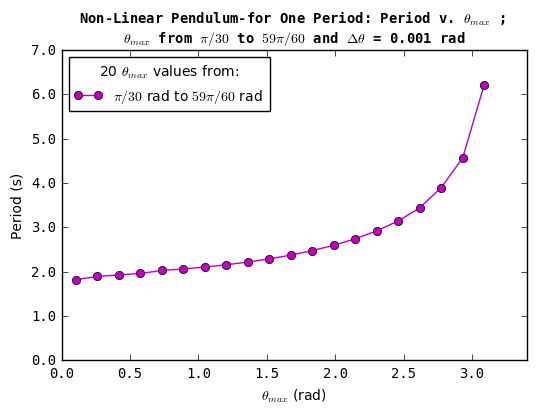

In [27]:
#visualize only the Period for each  cumulative sum of 
#after the numerical intregration each theta_max.
#that is cumulative sum of after the numerical intregration up the Number
#of Sequences to iterate - 1 
       
plt.plot(theta_max_values, T2,'m-o',label='$\\pi/30$ rad to $59\\pi/60$ rad ')
ax = plt.gca()
        
ax.set_title('Non-Linear Pendulum-for One Period: Period v. $\\theta_{max}$ ; \n\
$\\theta_{max}$ from $\\pi/30$ to $59\\pi/60$ and $\Delta\\theta$ = 0.001 rad',\
                     family='monospace',size=10, weight='bold')

ax.set_xlabel("$\\theta_{max}$ (rad)")
ax.set_ylabel("Period (s)")

    
ax.set_xlim(left=0,right=3.4)
ax.set_ylim(bottom=0, top=7.0)
    
ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)
        
        
ax.legend(fontsize=10, loc= 2,title='20 $\\theta_{max}$ values from:')

plt.figure(figsize=(30,10))
plt.show()        
        


Figure 1: Visualizing only the Period (the total cumulative sum) after the numerical
integration for each theta_max. That is cumulative sum after the numerical
integration up to number of sequences to iterate ($i_{max} - 1$)

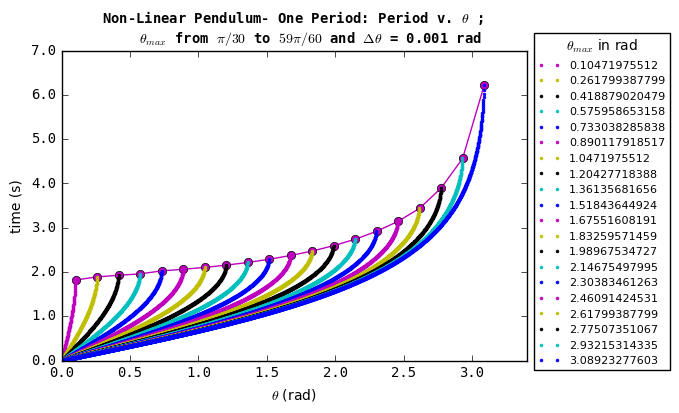

In [28]:
#visualize ethe cumulative sum of after the numerical integration for
#each theta_max.
#the last point for each theta_max
#represents the period that was previously graphed.

plt.figure()
plt.plot(theta_max_values, T2,'m-o',label='_nolegend_')

marker_color =     ['m.', 'y.', 'k.', 'c.','b.', 'm.', 'y.', 'k.', 'c.','b.',\
                    'm.', 'y.', 'k.', 'c.','b.', 'm.', 'y.', 'k.', 'c.','b.',\
                    'm.', 'y.', 'k.', 'c.','b.', 'm.', 'y.', 'k.', 'c.','b.',\
                    'm.', 'y.', 'k.', 'c.','b.', 'm.', 'y.', 'k.', 'c.','b.',\
                    'm.', 'y.', 'k.', 'c.','b.', 'm.', 'y.', 'k.', 'c.','b.'] 
    
for i in range(0,len(T2)):
    plt.plot(d_T[:,i], all_ints[:,i],marker_color[i],markersize=4)
    ax = plt.gca()
        
    ax.set_title('Non-Linear Pendulum- One Period: Period v. $\\theta$ ; \n\
    $\\theta_{max}$ from $\\pi/30$ to $59\\pi/60$ and $\Delta\\theta$ = 0.001 rad',\
                     family='monospace',size=10, weight='bold')

    ax.set_xlabel("$\\theta$ (rad)")
    ax.set_ylabel("time (s)")

    ax.set_xlim(left=0,right=3.4)
    
    
    ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)
        
       
ax.legend(theta_max_values,fontsize=8,title="$\\theta_{max}$ in rad",loc= 4, bbox_to_anchor=(1.32, -.05))
        
       
plt.show()


Figure 2: Visualizing the cumulative sum of after the numerical integration for each
$\theta_{max}$. The last point for each $\theta_{max}$ represents the period that was
previously graphed in figure 1. The plot is a nice piece to visualize
and backs up the results seen in figure 1.

## Results

When numerically evaluating the period, T, (as a function of $\theta_{max}$ -beyond- the small angle
approximation), it was seen that when plotting the arbitrary values of $\theta_{max}$ using numerical
integration (Equation 2 and 3), the period increased as $\theta_{max}$ values increased. Also note that,
as seen in both figure 1 and 2, that the integral diverges as $\theta_{max}$ approaches the vertical---that
means the limit of T (the period) as $\theta_{max}$ approaches pi is infinity. Looking in depth, this would
mean that a pendulum with enough energy to go vertical ($\theta_{max}$ = $\pi$) will in reality never get
vertical. This is because as $\theta_{max}$ approaches pi, the integral diverges. Unlike the small angle
approximation, where the period is independent of $\theta_{max}$, it is clear that with the realistic
pendulum, not in an isolated system, for larger $\theta_{max}$ values, as plotted in figure 1 and 2, the
period is dependent on $\theta_{max}$. The period,T, increases more and more until diverging with the
vertical, which in this non-linear osccillator pendulum problem is $\pi$ rad.